In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt


## EDA

In [2]:
df = pd.read_csv('dataset.csv')
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


The dataset has 85 columns and 91713 observations

In [4]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


Columns that are not necessary for our lerning process are dropped

In [13]:
df.drop(['Unnamed: 83', 'encounter_id','patient_id', 'icu_admit_source',
             'icu_id', 'icu_stay_type', 'icu_type'], axis = 1, inplace = True)

How many hospitals? 

In [ ]:
len(df.hospital_id.unique())

147

How many observations per hospitals?

In [21]:
counted = df['hospital_id'].value_counts().reset_index()
counted.columns = ['hospital_id', 'count']
counted.sort_values(by='count', ascending=True).head(50)

,hospital_id,count
146,130,2
145,95,6
144,93,6
143,4,7
142,23,7
141,124,9
140,167,10
139,38,10
138,84,12
137,74,13


Filter the dataset by removing hospitals with less than 100 observations

In [26]:
valid_hospitals = counted[counted['count'] > 100]['hospital_id']
filtered_df = df[df['hospital_id'].isin(valid_hospitals)]


In [28]:
counted = counted[counted['hospital_id'].isin(valid_hospitals)]
counted

,hospital_id,count
0,118,4333
1,19,3925
2,188,3095
3,161,2792
4,70,2754
...,...,...
112,87,111
113,51,110
114,104,109
115,113,108


117 valid hospitals remaining

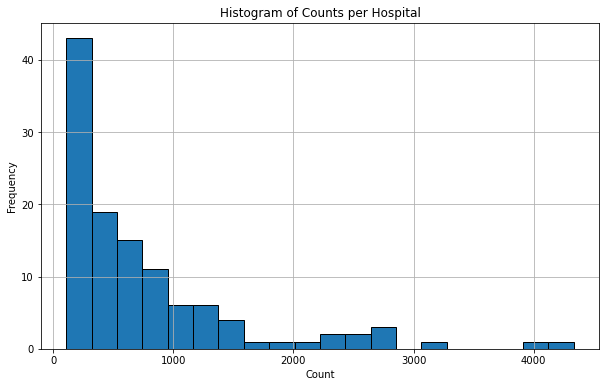

In [29]:

sorted_counts = counted.sort_values(by='count', ascending=False)

# Assuming sorted_counts is your DataFrame
plt.figure(figsize=(10, 6))
sorted_counts['count'].hist(bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Counts per Hospital')

# Show the plot
plt.show()

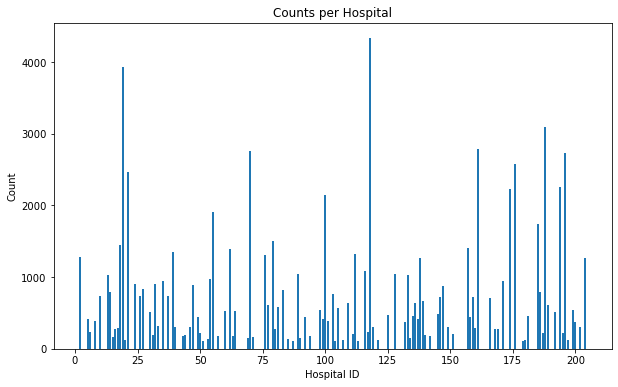

In [30]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts['hospital_id'], sorted_counts['count'])

# Add labels and title
plt.xlabel('Hospital ID')
plt.ylabel('Count')
plt.title('Counts per Hospital')

# Show the plot
plt.show()

## Preprocessing

### Missing Values

There are missing values?

In [31]:
# Assuming sorted_counts is your DataFrame
missing_values = filtered_df.isna().sum()

# Display the count of missing values in each column
missing_values.sort_values(ascending=False).head(40)

d1_potassium_min                 9402
d1_potassium_max                 9402
h1_mbp_noninvasive_min           8867
h1_mbp_noninvasive_max           8867
apache_4a_icu_death_prob         7590
apache_4a_hospital_death_prob    7590
h1_diasbp_noninvasive_min        7172
h1_diasbp_noninvasive_max        7172
h1_sysbp_noninvasive_max         7163
h1_sysbp_noninvasive_min         7163
d1_glucose_max                   5669
d1_glucose_min                   5669
h1_mbp_min                       4453
h1_mbp_max                       4453
h1_resprate_min                  4217
h1_resprate_max                  4217
age                              4158
h1_spo2_max                      4053
h1_spo2_min                      4053
temp_apache                      3986
h1_diasbp_min                    3472
h1_diasbp_max                    3472
h1_sysbp_min                     3464
h1_sysbp_max                     3464
bmi                              3363
h1_heartrate_min                 2682
h1_heartrate

Fill na values with median values